In [98]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import pandas as pd
tf.__version__

'2.3.0'

In [8]:
def BlackScholes_Call(T,r,sigma,s,k):
    d1 = (np.log(s/k)+(r+0.5*sigma*sigma)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    c = s*norm.cdf(d1)-k*np.exp(-r*T)*norm.cdf(d2)
    return(c)

In [134]:
S = np.linspace(start=50,stop=100,num=50)
T = np.linspace(start = 0.001,stop = 1,num = 50)
r = np.linspace(start = 0.001,stop = .2,num = 50)
sigma = np.linspace(start = 0.001,stop = .4,num = 50)
k = np.linspace(start=50,stop=100,num=50)

params =[]
BS = []
for i in range(100000):
    p = [np.random.choice(T),np.random.choice(r),np.random.choice(sigma),np.random.choice(S),np.random.choice(k)]

    c = BlackScholes_Call(*p)

    params.append(p)
    BS.append(c)

In [135]:
parameters = np.matrix(params)
Black = np.matrix(BS).T

In [90]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=[parameters.shape[1]]),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [115]:
EPOCHS = 1000

history = model.fit(parameters, Black,epochs=EPOCHS)


==============] - 1s 2ms/step - loss: 0.1835 - mae: 0.3076 - mse: 0.1835
Epoch 825/1000
313/313 [==============================] - 1s 3ms/step - loss: 0.1811 - mae: 0.2991 - mse: 0.1811
Epoch 826/1000
313/313 [==============================] - 1s 3ms/step - loss: 0.1793 - mae: 0.3026 - mse: 0.1793
Epoch 827/1000
313/313 [==============================] - 1s 2ms/step - loss: 0.1823 - mae: 0.3129 - mse: 0.1823
Epoch 828/1000
313/313 [==============================] - 1s 2ms/step - loss: 0.1823 - mae: 0.3023 - mse: 0.1823
Epoch 829/1000
313/313 [==============================] - 1s 3ms/step - loss: 0.1792 - mae: 0.3005 - mse: 0.1792
Epoch 830/1000
313/313 [==============================] - 1s 3ms/step - loss: 0.1803 - mae: 0.3042 - mse: 0.1803
Epoch 831/1000
313/313 [==============================] - 1s 3ms/step - loss: 0.1773 - mae: 0.2977 - mse: 0.1773
Epoch 832/1000
313/313 [==============================] - 1s 3ms/step - loss: 0.1846 - mae: 0.3079 - mse: 0.1846
Epoch 833/1000
313/313 

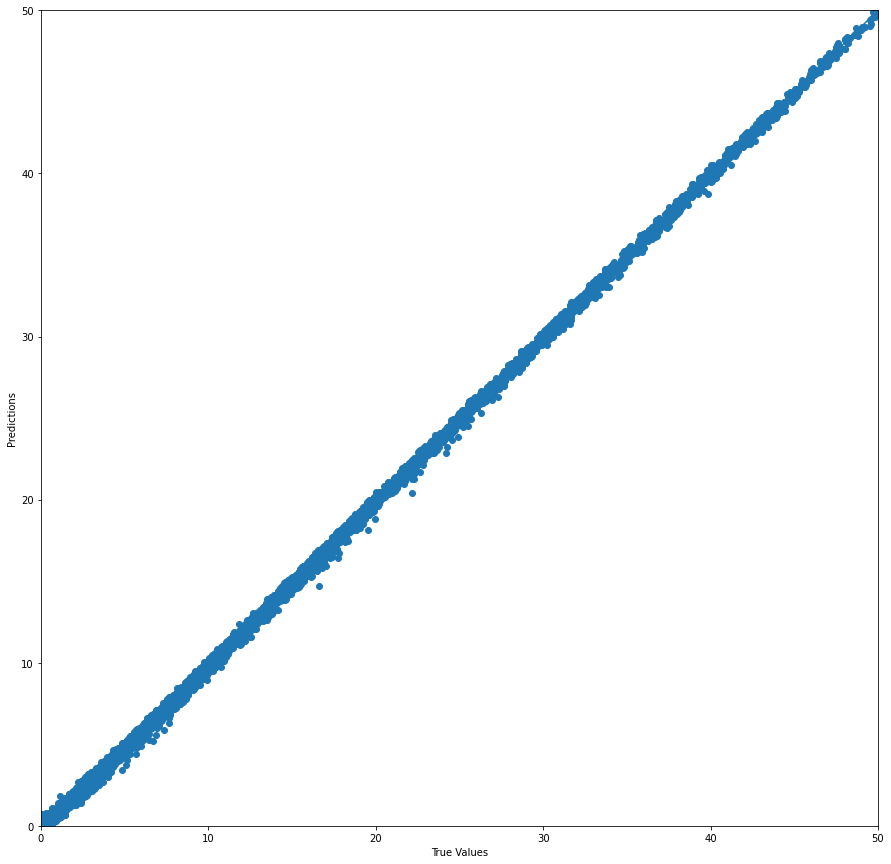

In [133]:
test_predictions = model.predict(parameters).flatten()

plt.figure(figsize=(15,15))
plt.scatter(np.array(Black.flatten()), test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


matrix([[9.87406795e+00, 2.04990782e-05, 4.18836572e-08, ...,
         4.63940770e+00, 3.77831269e+01, 8.81486554e-13]])

In [91]:
model = build_model()